In [1]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import random 

#  Non-Dividend Paying Black-Scholes Formula

In [28]:
def euro_vanilla_call(S, K, T, r, sigma):
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    d1 = (np.log(S/K) + (r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = (np.log(S/K) + (r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))

    call = (S*si.norm.cdf(d1,0.0,1.0) - K*np.exp(-r*T)*si.norm.cdf(d2,0.0,1.0))
    payoff = max((S - K),0)

    return call,payoff

In [9]:
def Binary_call(S, K, T, r, sigma):
    d2 = (np.log(S/K) + (r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    
    call = np.exp(-r*T)*si.norm.cdf(d2,0.0,1.0)
    if(S>=K):
        payoff = 1.0;
    else:
        payoff = 0.0;
    return call,payoff

In [10]:
def euro_vanilla_put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = (np.log(S/K) + (r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    
    put = (K*np.exp(-r*T)*si.norm.cdf(-d2,0.0,1.0) - S*si.norm.cdf(-d1,0.0,1.0))
    payoff = max((K - S),0)
    
    return put,payoff

In [11]:
def Binary_put(S, K, T, r, sigma):
    d2 = (np.log(S/K) + (r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    
    put = np.exp(-r*T) * (1-si.norm.cdf(d2,0.0,1.0))
    if(S<K):
        payoff = 1.0;
    else:
        payoff = 0.0;
    return put,payoff

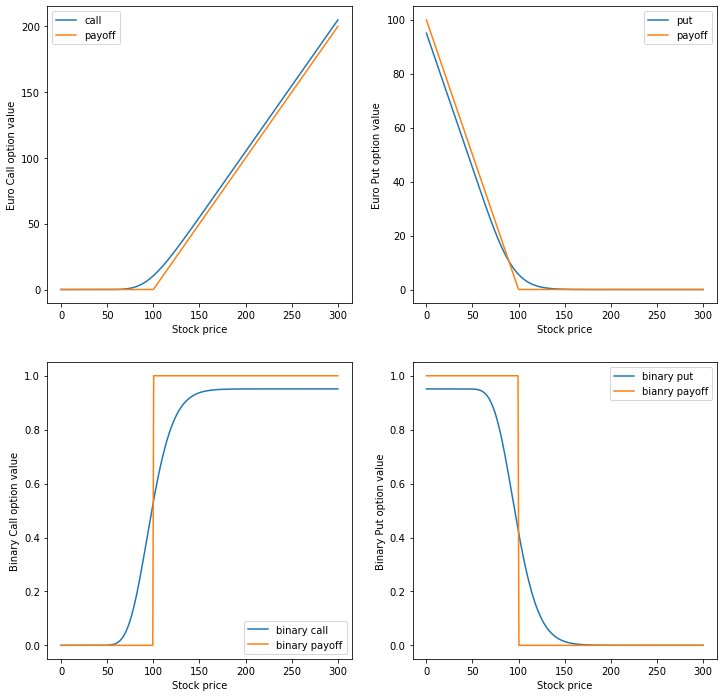

In [16]:
S = np.linspace(0.1,300,300)
p_call = []
p_put = []
c_payoff = []
p_payoff = []

b_call=[]
b_put=[]
bc_payoff=[]
bp_payoff=[]
for i in S:
    #get Euro call and put & their payoff 
    call,call_payoff = euro_vanilla_call(i, 100, 1, 0.05, 0.2)
    put,put_payoff = euro_vanilla_put(i, 100, 1, 0.05, 0.2)
    p_call.append(call)
    p_put.append(put)
    c_payoff.append(call_payoff)
    p_payoff.append(put_payoff)
    
    #get binary call and put & their payoff 
    binary_call,binary_call_payoff = Binary_call(i, 100, 1, 0.05, 0.2)
    binary_put,binary_put_payoff = Binary_put(i, 100, 1, 0.05, 0.2)
    b_call.append(binary_call)
    b_put.append(binary_put)
    bc_payoff.append(binary_call_payoff)
    bp_payoff.append(binary_put_payoff)
    
    
plt.figure(figsize=(12,12))

ax = plt.subplot(2,2,1)
ax.plot(S,p_call,label = 'call')
ax.plot(S,c_payoff,label='payoff')
plt.xlabel("Stock price")
plt.ylabel("Euro Call option value")
plt.legend()

ax = plt.subplot(2,2,2)
ax.plot(S,p_put,label='put')
ax.plot(S,p_payoff,label='payoff')
plt.xlabel("Stock price")
plt.ylabel("Euro Put option value")
plt.legend()

ax = plt.subplot(2,2,3)
ax.plot(S,b_call,label = 'binary call')
ax.plot(S,bc_payoff,label='binary payoff')
plt.xlabel("Stock price")
plt.ylabel("Binary Call option value")
plt.legend()

ax = plt.subplot(2,2,4)
ax.plot(S,b_put,label='binary put')
ax.plot(S,bp_payoff,label='bianry payoff')
plt.xlabel("Stock price")
plt.ylabel("Binary Put option value")
plt.legend()

# Dividend Paying Black-Scholes Formula

In [ ]:
def euro_call_div(S, K, T, r, q, sigma):
    #q: rate of continuous dividend paying asset 
    d1 = (np.log(S/K) + (r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = (np.log(S/K) + (r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    
    call_div = (S*np.exp(-q*T)*si.norm.cdf(d1,0.0,1.0) - K*np.exp(-r*T)*si.norm.cdf(d2, 0.0, 1.0))
    return call_div

In [ ]:
def euro_put_div(S, K, T, r, q, sigma):
    #q: rate of continuous dividend paying asset 
    d1 = (np.log(S/K) + (r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = (np.log(S/K) + (r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    
    put_div = (K*np.exp(-r*T)*si.norm.cdf(-d2,0.0,1.0)-S*np.exp(-q*T)*si.norm.cdf(-d1, 0.0, 1.0))
    return put_div

# Monte Carlo Simulation

#### Parameters：
    Stock = 100.0
    rate = 0.05
    sigma = 0.2
    Time = 1
    days = 252
    step = Time / days
    strike = 100.0
    disc = np.exp(-rate*Time)
    simulations = 270

In [29]:
def generate_stock(S,r,sig,dt,days,simulations):
    stock = np.zeros((days+1,simulations))
    stock[0] = 100.0
    for i in range(days):
        for j in range(simulations):
            stock[i+1][j] = stock[i][j]*(1+r*dt+sig*np.sqrt(dt)*si.norm.ppf(np.random.rand()))
    return stock

In [30]:
def Vanilla_Call(strike,rate,Time,simulations,days):
    sigma = 0.2
    stock = generate_stock(100,rate,sigma,1/days,days,simulations)
    Euro_Payoff = []
    for i in range(simulations):
        Euro_Payoff.append(np.maximum(stock[days][i]-strike,0))
    DPO = []
    disc = np.exp(-rate*Time)
    for i in range(simulations):
        DPO.append(disc*Euro_Payoff[i])
    MC_Vanilla_Call = np.average(DPO)
    return MC_Vanilla_Call

In [31]:
def Binary_Call(rate,Time,simulations,days):
    Binary_Call_PO = []
    for i in range(simulations):
        if stock[days][i] > strike:
            Binary_Call_PO.append(1)
        else:
            Binary_Call_PO.append(0)
            
    Binary_DPO = []
    disc = np.exp(-rate*Time)
    for i in range(simulations):
        Binary_DPO.append(disc*Binary_Call_PO[i])
    
    MC_Binary_Call = np.average(Binary_DPO)
    
    return MC_Binary_Call

# Compare Monte Carlo and Black shole Model

In [32]:
X = [10,50,100] #Number of simulations
S = [85,90,95,100,105,110,115] #different stock price
Error = np.zeros((len(X),len(S)))
for i in range(len(S)-1):
    for j in rangeX:
        Error[i][j] = (Vanilla_Call(i,0.05,1,j,365) - euro_vanilla_call(100, i, 1, 0.05, 0.2)) /  euro_vanilla_call(100, i, 1, 0.05, 0.2)
print(Error)
        
    
    
    
    
    
    
    
    

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


IndexError: index 85 is out of bounds for axis 0 with size 3

In [36]:
P = [10,50,100] #Number of simulationsprint
print(len(P))
for i in range(len(P)):
    print(i)
   









3
0
1
2
